In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


## Read in the family information and sample submission

In [4]:
fpath = 'family_data.csv'
data = pd.read_csv(fpath, index_col='family_id')

fpath = 'sample_submission.csv'
submission = pd.read_csv(fpath, index_col='family_id')

In [5]:
data.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4
1,26,4,82,5,11,47,38,6,66,61,4
2,100,54,25,12,27,82,10,89,80,33,3
3,2,95,1,96,32,6,40,31,9,59,2
4,53,1,47,93,26,3,46,16,42,39,4


In [6]:
submission.head()

,assigned_day
family_id,
0,100
1,99
2,98
3,97
4,96


In [7]:
data.groupby('choice_0')['choice_0'].count().index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='choice_0')

## Exploring the Family Data

In [8]:
import datetime
base = datetime.datetime(2019,12,24,00)
base

datetime.datetime(2019, 12, 24, 0, 0)

In [9]:
date_list = [base - datetime.timedelta(days=x) for x in range(100)]
date_list

[datetime.datetime(2019, 12, 24, 0, 0),
 datetime.datetime(2019, 12, 23, 0, 0),
 datetime.datetime(2019, 12, 22, 0, 0),
 datetime.datetime(2019, 12, 21, 0, 0),
 datetime.datetime(2019, 12, 20, 0, 0),
 datetime.datetime(2019, 12, 19, 0, 0),
 datetime.datetime(2019, 12, 18, 0, 0),
 datetime.datetime(2019, 12, 17, 0, 0),
 datetime.datetime(2019, 12, 16, 0, 0),
 datetime.datetime(2019, 12, 15, 0, 0),
 datetime.datetime(2019, 12, 14, 0, 0),
 datetime.datetime(2019, 12, 13, 0, 0),
 datetime.datetime(2019, 12, 12, 0, 0),
 datetime.datetime(2019, 12, 11, 0, 0),
 datetime.datetime(2019, 12, 10, 0, 0),
 datetime.datetime(2019, 12, 9, 0, 0),
 datetime.datetime(2019, 12, 8, 0, 0),
 datetime.datetime(2019, 12, 7, 0, 0),
 datetime.datetime(2019, 12, 6, 0, 0),
 datetime.datetime(2019, 12, 5, 0, 0),
 datetime.datetime(2019, 12, 4, 0, 0),
 datetime.datetime(2019, 12, 3, 0, 0),
 datetime.datetime(2019, 12, 2, 0, 0),
 datetime.datetime(2019, 12, 1, 0, 0),
 datetime.datetime(2019, 11, 30, 0, 0),
 datetime

In [10]:
date_index = pd.DataFrame(date_list,columns=['date'])
date_index['day'] = date_index['date'].apply(lambda x: x.dayofweek)
date_index.index += 1 
date_index

,date,day
1,2019-12-24,1
2,2019-12-23,0
3,2019-12-22,6
4,2019-12-21,5
5,2019-12-20,4
...,...,...
96,2019-09-20,4
97,2019-09-19,3
98,2019-09-18,2
99,2019-09-17,1


In [11]:
date_dict = date_index.day.to_dict()
data['choice_0_day']= data['choice_0'].map(date_dict)

In [13]:
data

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people,choice_0_day
family_id,,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4,6
1,26,4,82,5,11,47,38,6,66,61,4,4
2,100,54,25,12,27,82,10,89,80,33,3,0
3,2,95,1,96,32,6,40,31,9,59,2,0
4,53,1,47,93,26,3,46,16,42,39,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,16,1,66,33,18,70,56,46,86,60,4,0
4996,88,66,20,17,26,54,81,91,59,48,2,5
4997,32,66,54,17,27,21,74,81,3,7,6,5


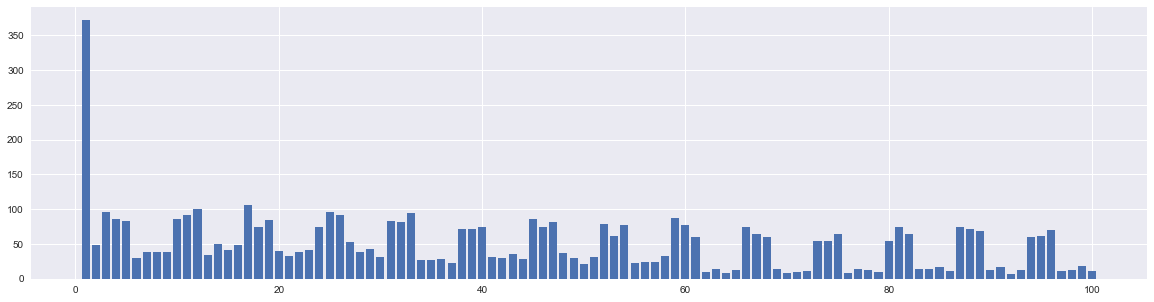

In [14]:
plt.close('all')
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(20,5))

bar = ax.bar(data.groupby('choice_0')['choice_0'].count().index,data.groupby('choice_0')['choice_0'].count().values)

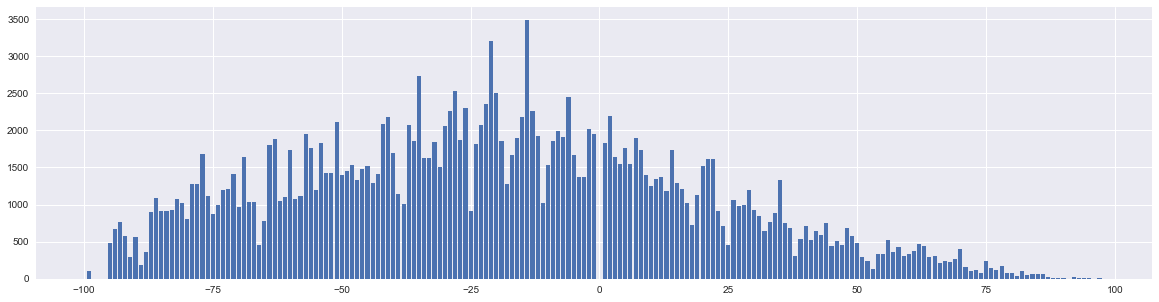

In [15]:
plt.close('all')
plt.style.use('seaborn')


fig, ax = plt.subplots(figsize=(20,5))

bar = ax.bar(data.groupby((data['choice_1'] - data['choice_0'])).agg('sum',axis="columns")['choice_0'].index,\
       data.groupby((data['choice_1'] - data['choice_0'])).agg('sum',axis="columns")['choice_0'])

In [16]:
data.groupby('choice_0_day').count()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
choice_0_day,,,,,,,,,,,
0,391,391,391,391,391,391,391,391,391,391,391
1,714,714,714,714,714,714,714,714,714,714,714
2,349,349,349,349,349,349,349,349,349,349,349
3,344,344,344,344,344,344,344,344,344,344,344
4,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073
5,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
6,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088


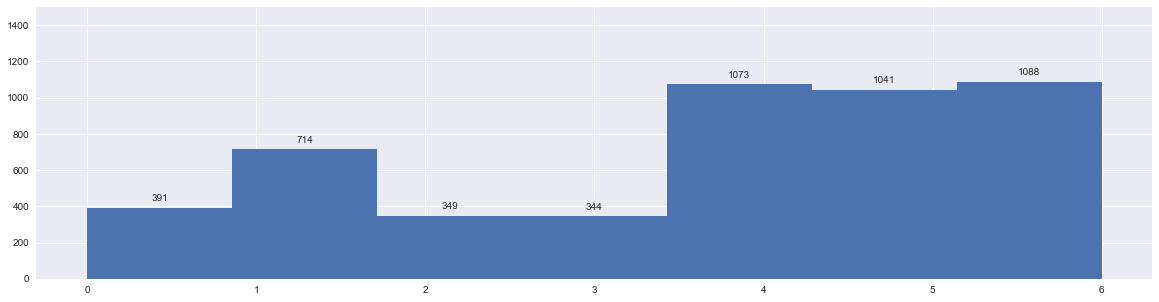

In [17]:
plt.close('all')
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(20,5))

hist = ax.hist(data['choice_0_day'].astype('int'),bins=7)
ax.set(ylim=(0,1500))

add_value_labels(ax)

In [60]:
# Creating my empty occupancy dataframe
occupancy = pd.DataFrame(0,index=date_index.index,columns=['occ_count'])
occupancy


,occ_count
1,0
2,0
3,0
4,0
5,0
...,...
96,0
97,0
98,0
99,0


In [61]:
non_weekend_or_xmas = data.where(~data.choice_0_day.isin([5,6])&data.choice_0_day != 1).dropna()
non_weekend_or_xmas.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people,choice_0_day
family_id,,,,,,,,,,,,
0,52.0,38.0,12.0,82.0,33.0,75.0,64.0,76.0,10.0,28.0,4.0,6.0
1,26.0,4.0,82.0,5.0,11.0,47.0,38.0,6.0,66.0,61.0,4.0,4.0
2,100.0,54.0,25.0,12.0,27.0,82.0,10.0,89.0,80.0,33.0,3.0,0.0
3,2.0,95.0,1.0,96.0,32.0,6.0,40.0,31.0,9.0,59.0,2.0,0.0
4,53.0,1.0,47.0,93.0,26.0,3.0,46.0,16.0,42.0,39.0,4.0,5.0


In [62]:
for value in non_weekend_or_xmas['choice_0']:
    occupancy['occ_count'][value] += 1
    print(value)

52.0
26.0
100.0
2.0
53.0
32.0
88.0
25.0
18.0
96.0
19.0
52.0
54.0
45.0
46.0
47.0
75.0
3.0
3.0
56.0
61.0
19.0
75.0
16.0
58.0
38.0
81.0
89.0
68.0
74.0
24.0
32.0
46.0
31.0
47.0
10.0
25.0
31.0
81.0
11.0
49.0
5.0
45.0
32.0
33.0
67.0
28.0
33.0
37.0
94.0
91.0
12.0
31.0
74.0
39.0
18.0
31.0
3.0
47.0
89.0
5.0
32.0
11.0
66.0
10.0
82.0
53.0
46.0
52.0
18.0
17.0
32.0
88.0
9.0
54.0
25.0
23.0
54.0
17.0
5.0
47.0
24.0
75.0
96.0
3.0
39.0
39.0
53.0
31.0
68.0
47.0
12.0
12.0
17.0
67.0
68.0
60.0
18.0
77.0
94.0
4.0
56.0
17.0
24.0
95.0
14.0
47.0
3.0
2.0
56.0
17.0
16.0
11.0
54.0
18.0
5.0
88.0
82.0
59.0
89.0
61.0
89.0
26.0
38.0
28.0
18.0
28.0
63.0
61.0
60.0
3.0
88.0
3.0
25.0
100.0
95.0
87.0
3.0
40.0
47.0
68.0
84.0
18.0
14.0
95.0
19.0
67.0
12.0
24.0
21.0
68.0
94.0
17.0
52.0
74.0
80.0
26.0
40.0
7.0
94.0
17.0
4.0
80.0
10.0
9.0
54.0
77.0
12.0
95.0
26.0
59.0
81.0
51.0
26.0
47.0
23.0
38.0
67.0
28.0
47.0
9.0
23.0
67.0
10.0
52.0
31.0
5.0
38.0
68.0
17.0
60.0
4.0
61.0
59.0
49.0
87.0
47.0
87.0
82.0
53.0
37.0
3.0
19.0
14.0
3

40.0
17.0
32.0
9.0
32.0
16.0
96.0
77.0
95.0
26.0
74.0
94.0
17.0
88.0
87.0
44.0
95.0
81.0
25.0
70.0
33.0
59.0
30.0
31.0
18.0
96.0
24.0
40.0
53.0
87.0
30.0
53.0
74.0
12.0
7.0
11.0
60.0
11.0
17.0
3.0
33.0
16.0
98.0
17.0
80.0
95.0
10.0
66.0
33.0
60.0
33.0
58.0
35.0
19.0
65.0
24.0
52.0
58.0
68.0
66.0
47.0
3.0
31.0
52.0
47.0
32.0
21.0
19.0
59.0
5.0
10.0
68.0
30.0
33.0
75.0
89.0
74.0
80.0
33.0
98.0
14.0
60.0
5.0
66.0
11.0
33.0
7.0
40.0
21.0
26.0
32.0
14.0
46.0
24.0
33.0
79.0
24.0
28.0
24.0
73.0
4.0
82.0
88.0
16.0
33.0
81.0
11.0
95.0
33.0
61.0
12.0
30.0
45.0
47.0
45.0
66.0
75.0
81.0
93.0
39.0
33.0
23.0
40.0
10.0
21.0
4.0
70.0
24.0
39.0
35.0
31.0
4.0
87.0
73.0
23.0
87.0
68.0
25.0
87.0
10.0
74.0
94.0
84.0
14.0
30.0
61.0
58.0
96.0
47.0
100.0
12.0
74.0
40.0
75.0
24.0
19.0
81.0
32.0
39.0
59.0
44.0
24.0
79.0
45.0
11.0
82.0
5.0
94.0
40.0
31.0
10.0
75.0
35.0
19.0
80.0
45.0
47.0
60.0
60.0
95.0
59.0
61.0
72.0
53.0
46.0
80.0
26.0
30.0
67.0
32.0
51.0
18.0
11.0
24.0
31.0
45.0
32.0
10.0
67.0
46.0
4.0
25.0
6

74.0
95.0
19.0
5.0
10.0
26.0
31.0
12.0
66.0
31.0
16.0
12.0
39.0
26.0
40.0
40.0
42.0
33.0
3.0
10.0
45.0
11.0
7.0
11.0
32.0
81.0
28.0
25.0
75.0
91.0
68.0
74.0
10.0
33.0
89.0
46.0
52.0
87.0
59.0
17.0
59.0
60.0
94.0
12.0
74.0
24.0
38.0
84.0
21.0
30.0
87.0
66.0
74.0
12.0
53.0
45.0
45.0
89.0
18.0
39.0
61.0
47.0
95.0
21.0
51.0
82.0
17.0
40.0
52.0
19.0
25.0
31.0
19.0
3.0
52.0
17.0
86.0
19.0
10.0
40.0
54.0
25.0
17.0
95.0
31.0
91.0
82.0
81.0
17.0
30.0
11.0
33.0
26.0
86.0
79.0
94.0
14.0
9.0
96.0
67.0
87.0
16.0
66.0
52.0
75.0
67.0
46.0
88.0
40.0
75.0
72.0
52.0
45.0
40.0
32.0
33.0
47.0
4.0
45.0
10.0
5.0
80.0
94.0
5.0
59.0
11.0
28.0
31.0
94.0
80.0
38.0
96.0
88.0
35.0
40.0
19.0
80.0
3.0
3.0
14.0
45.0
73.0
25.0
39.0
19.0
54.0
88.0
18.0
66.0
45.0
42.0
70.0
35.0
56.0
30.0
5.0
47.0
4.0
56.0
74.0
68.0
31.0
89.0
11.0
7.0
54.0
95.0
5.0
38.0
45.0
5.0
10.0
9.0
91.0
88.0
59.0
74.0
3.0
66.0
45.0
81.0
95.0
16.0
82.0
44.0
16.0
9.0
66.0
45.0
54.0
54.0
66.0
12.0
73.0
46.0
11.0
47.0
14.0
45.0
38.0
21.0
11.0
95.0
89.

In [65]:
occupancy.groupby('occ_count').agg('sum')

""
occ_count
0
8
10
11
12
14
17
23
24


## No days over the threshold of 300, but all are under and will need to be filled

In [23]:
for i in range(10):
    print(data['choice_{}'.format(i)])

family_id
0        52
1        26
2       100
3         2
4        53
       ... 
4995     16
4996     88
4997     32
4998     67
4999     13
Name: choice_0, Length: 5000, dtype: int64
family_id
0       38
1        4
2       54
3       95
4        1
        ..
4995     1
4996    66
4997    66
4998    92
4999    11
Name: choice_1, Length: 5000, dtype: int64
family_id
0       12
1       82
2       25
3        1
4       47
        ..
4995    66
4996    20
4997    54
4998     4
4999    25
Name: choice_2, Length: 5000, dtype: int64
family_id
0       82
1        5
2       12
3       96
4       93
        ..
4995    33
4996    17
4997    17
4998    17
4999    80
Name: choice_3, Length: 5000, dtype: int64
family_id
0       33
1       11
2       27
3       32
4       26
        ..
4995    18
4996    26
4997    27
4998    53
4999    88
Name: choice_4, Length: 5000, dtype: int64
family_id
0       75
1       47
2       82
3        6
4        3
        ..
4995    70
4996    54
4997    21
4998    77

## Most people's first preference is on Friday, Saturday, Sunday

## Create some lookup dictionaries and define constants

You don't need to do it this way. :-)

In [24]:
family_size_dict = data[['n_people']].to_dict()['n_people']

cols = [f'choice_{i}' for i in range(10)]
choice_dict = data[cols].to_dict()

N_DAYS = 100
MAX_OCCUPANCY = 300
MIN_OCCUPANCY = 125

# from 100 to 1
days = list(range(N_DAYS,0,-1))

## Cost Function
Very un-optimized  ;-)

In [8]:
def cost_function(prediction):

    penalty = 0

    # We'll use this to count the number of people scheduled each day
    daily_occupancy = {k:0 for k in days}

    # Looping over each family; d is the day for each family f
    for f, d in enumerate(prediction):

        # Using our lookup dictionaries to make simpler variable names
        n = family_size_dict[f]
        choice_0 = choice_dict['choice_0'][f]
        choice_1 = choice_dict['choice_1'][f]
        choice_2 = choice_dict['choice_2'][f]
        choice_3 = choice_dict['choice_3'][f]
        choice_4 = choice_dict['choice_4'][f]
        choice_5 = choice_dict['choice_5'][f]
        choice_6 = choice_dict['choice_6'][f]
        choice_7 = choice_dict['choice_7'][f]
        choice_8 = choice_dict['choice_8'][f]
        choice_9 = choice_dict['choice_9'][f]

        # add the family member count to the daily occupancy
        daily_occupancy[d] += n

        # Calculate the penalty for not getting top preference
        if d == choice_0:
            penalty += 0
        elif d == choice_1:
            penalty += 50
        elif d == choice_2:
            penalty += 50 + 9 * n
        elif d == choice_3:
            penalty += 100 + 9 * n
        elif d == choice_4:
            penalty += 200 + 9 * n
        elif d == choice_5:
            penalty += 200 + 18 * n
        elif d == choice_6:
            penalty += 300 + 18 * n
        elif d == choice_7:
            penalty += 300 + 36 * n
        elif d == choice_8:
            penalty += 400 + 36 * n
        elif d == choice_9:
            penalty += 500 + 36 * n + 199 * n
        else:
            penalty += 500 + 36 * n + 398 * n

    # for each date, check total occupancy
    #  (using soft constraints instead of hard constraints)
    for _, v in daily_occupancy.items():
        if (v > MAX_OCCUPANCY) or (v < MIN_OCCUPANCY):
            penalty += 100000000

    # Calculate the accounting cost
    # The first day (day 100) is treated special
    accounting_cost = (daily_occupancy[days[0]]-125.0) / 400.0 * daily_occupancy[days[0]]**(0.5)
    # using the max function because the soft constraints might allow occupancy to dip below 125
    accounting_cost = max(0, accounting_cost)
    
    # Loop over the rest of the days, keeping track of previous count
    yesterday_count = daily_occupancy[days[0]]
    for day in days[1:]:
        today_count = daily_occupancy[day]
        diff = abs(today_count - yesterday_count)
        accounting_cost += max(0, (daily_occupancy[day]-125.0) / 400.0 * daily_occupancy[day]**(0.5 + diff / 50.0))
        yesterday_count = today_count

    penalty += accounting_cost

    return penalty

## Simple Opimization Approach

For each family, loop over their choices, and if keep it if the score improves. There's a lot of easy improvement that can be made to this code.

In [ ]:
# Start with the sample submission values
best = submission['assigned_day'].tolist()
start_score = cost_function(best)

new = best.copy()
# loop over each family
for fam_id, _ in enumerate(best):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission['assigned_day'] = new
score = cost_function(new)
submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')